# ISOLATION FOREST TO DETECT THE OUTLIERS

ISOLATION FOREST is just a outlier detection method. It will do nothing to the outlier.

isolation forest is a method to detect the outliers and normal datapoints. After finding out which datapoints area outlier I have to make decision like whether I should remove these outliers out cap them by using capping method or keep them as it is.

In [2]:
# imprting necessary liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import IsolationForest
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/refs/heads/main/Isolation_data.csv')
df

,Frozen,Delicassen
0,214,1338
1,1762,1776
2,2405,7844
3,6404,1788
4,3915,5185
...,...,...
435,13135,2204
436,4510,2346
437,437,1867
438,1038,2125


<Axes: >

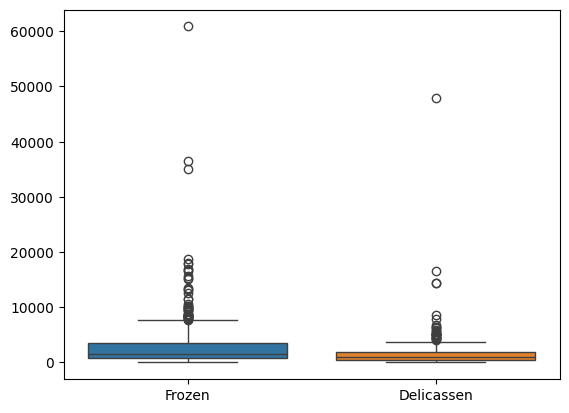

In [6]:
# just to get an idea about the outliers present in the dataset
sns.boxplot(df)

In [ ]:
# both column are having outliers

In [7]:
# using isolation forest to detect the outliers
# iso = IsolationForest(contamination=0.05)
iso = IsolationForest()
iso.fit(df)
ypred = iso.predict(df)
ypred

array([ 1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1

In [ ]:
# -1 label is representing that a datapoint is outlier datapoint
# 1 label is representing that a datapoint is normal datapoint

isolation foreset has created 100 decision tree by default and calculated anomaly score. Wherein each of the isolation forest will take sample of data.
it keep on splitting data unless and untill it all the datapoints are isolated.

In [ ]:
# anomaly score ranges from 0 to 1
# less than 0.5 --> if anomaly score is less than 0.5 then it is treated as normal datapoint
# greater than 0.5 --> if anomaly score is less than 0.5 then it is treated as outlier datapoint

In [8]:
# storing labels into the dataframe

df['outlier/normal'] = ypred

In [10]:
df.head()

,Frozen,Delicassen,outlier/normal
0,214,1338,1
1,1762,1776,1
2,2405,7844,-1
3,6404,1788,1
4,3915,5185,-1


In [14]:
# only outlier datapoints
outliers = df[df['outlier/normal']== -1]
outliers

,Frozen,Delicassen,outlier/normal
2,2405,7844,-1
4,3915,5185,-1
17,839,4478,-1
22,9408,4334,-1
23,5154,16523,-1
24,2915,5778,-1
28,1158,5206,-1
36,1729,4626,-1
39,10002,2916,-1
40,9510,5864,-1


In [15]:
# how many outliers
outliers.shape

(51, 3)

there are 51 outlier datapoints in the dataset

In [12]:
# only normal datapoints

df[df['outlier/normal'] == 1 ]

,Frozen,Delicassen,outlier/normal
0,214,1338,1
1,1762,1776,1
3,6404,1788,1
5,666,1451,1
6,480,545,1
...,...,...,...
434,688,838,1
436,4510,2346,1
437,437,1867,1
438,1038,2125,1


total 389 normal datapoints are there in dataset

In [21]:
# plotting interactive boxplot
import plotly.express as px

# oberving outliers in Delicassen column
px.box(df['Delicassen'], orientation='h')

In [22]:
# oberving outliers in Frozen column
px.box(df['Frozen'], orientation='h')


In [23]:
# total count of outlier datapont and normal datapoints
df['outlier/normal'].value_counts()

,count
outlier/normal,
1,389
-1,51
